In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import kaleido

import nbformat
print(nbformat.__version__)

df = pd.read_csv('./Data/MyAir_SleepData/SLEEP_RECORD.csv')
df_filtered = df[['SESSION_DATE','USAGE_HOURS', 'SLEEP_SCORE', 'AHI_SCORE', 'LEAK_SCORE', 'MASK_SCORE',
       'USAGE_SCORE', 'MASK_SESSION_COUNT', 'AHI', 'LEAK_50_PERCENTILE','LEAK_70_PERCENTILE', 'LEAK_95_PERCENTILE']]
df_filtered.head()
df_filtered['SESSION_DATE'] = pd.to_datetime(df_filtered['SESSION_DATE'])
df_filtered.head()
df_filtered.shape
df_filtered['SESSION_DATE'] = df_filtered['SESSION_DATE'].dt.strftime('%Y-%m-%d')
df_filtered['SESSION_DATE'] = pd.to_datetime(df_filtered['SESSION_DATE'])
df_filtered.sort_values(by='SESSION_DATE', ascending=True, inplace=True)
df_filtered.reset_index(drop=True, inplace=True)
df_filtered.head()


5.10.4


/var/folders/1j/8w6961zx1mq533_01rtc6xkh0000gn/T/ipykernel_23658/404754774.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['SESSION_DATE'] = pd.to_datetime(df_filtered['SESSION_DATE'])
/var/folders/1j/8w6961zx1mq533_01rtc6xkh0000gn/T/ipykernel_23658/404754774.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['SESSION_DATE'] = df_filtered['SESSION_DATE'].dt.strftime('%Y-%m-%d')
/var/folders/1j/8w6961zx1mq533_01rtc6xkh0000gn/T/ipykernel_23658/404754774.py:21: SettingWithCopyWar

AttributeError: 'DataFrame' object has no attribute 'Session_Date'

In [2]:

# Extract the day name from the date
df_filtered['DAY_NAME'] = df_filtered['SESSION_DATE'].dt.day_name()


/var/folders/1j/8w6961zx1mq533_01rtc6xkh0000gn/T/ipykernel_23658/609198655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DAY_NAME'] = df_filtered['SESSION_DATE'].dt.day_name()


In [3]:
df_filtered.head()

,SESSION_DATE,USAGE_HOURS,SLEEP_SCORE,AHI_SCORE,LEAK_SCORE,MASK_SCORE,USAGE_SCORE,MASK_SESSION_COUNT,AHI,LEAK_50_PERCENTILE,LEAK_70_PERCENTILE,LEAK_95_PERCENTILE,DAY_NAME
0,2024-12-29,0.066667,29,5,20,3,1,4,0.0,13.2,15.6,16.8,Sunday
1,2024-12-30,11.283333,92,5,13,4,70,3,6.3,1.2,9.6,30.0,Monday
2,2024-12-31,9.250000,88,5,8,5,70,2,2.0,16.8,22.8,39.6,Tuesday
3,2025-01-01,10.383333,86,5,7,4,70,3,1.5,9.6,13.2,42.0,Wednesday
4,2025-01-02,9.750000,83,5,7,1,70,5,3.7,2.4,7.2,42.0,Thursday


In [4]:
df_filtered['DAY_NAME'].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

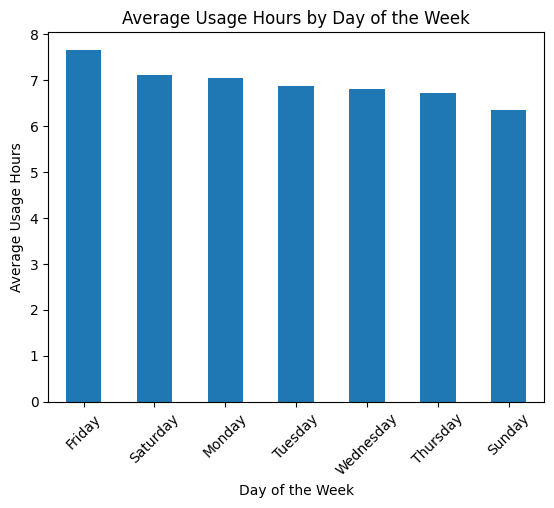

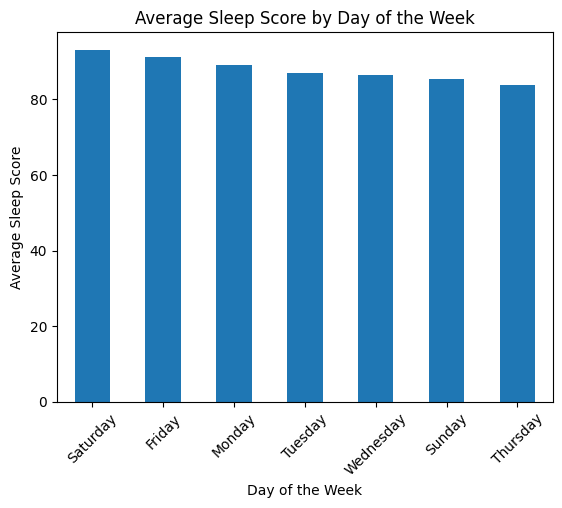

In [6]:
df_filtered.groupby('DAY_NAME')['USAGE_HOURS'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Usage Hours by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Usage Hours')
plt.xticks(rotation=45)
plt.show()
# Create a bar plot for average sleep score by day of the week
df_filtered.groupby('DAY_NAME')['SLEEP_SCORE'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Sleep Score by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sleep Score')
plt.xticks(rotation=45)
plt.show()

/var/folders/1j/8w6961zx1mq533_01rtc6xkh0000gn/T/ipykernel_23658/1275679408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['MONTH'] = df_filtered['SESSION_DATE'].dt.month
/var/folders/1j/8w6961zx1mq533_01rtc6xkh0000gn/T/ipykernel_23658/1275679408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DAY'] = df_filtered['SESSION_DATE'].dt.day


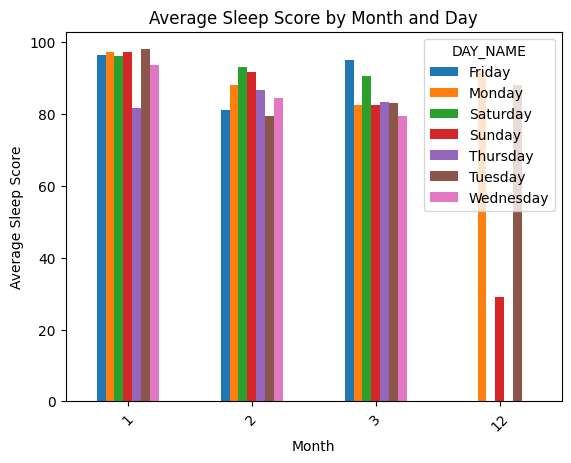

In [8]:
# grouby by month and day
df_filtered['MONTH'] = df_filtered['SESSION_DATE'].dt.month
df_filtered['DAY'] = df_filtered['SESSION_DATE'].dt.day
# Create a bar plot for average sleep score by month and day
df_filtered.groupby(['MONTH', 'DAY_NAME'])['SLEEP_SCORE'].mean().unstack().plot(kind='bar')
plt.title('Average Sleep Score by Month and Day')
plt.xlabel('Month')
plt.ylabel('Average Sleep Score')
plt.xticks(rotation=45)
plt.show()
